# ***IMPORTING OF THE NECESSARY LIBRARIES***

In [0]:
import nltk
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation as LDA
from neupy import algorithms, utils

***DOWNLOADING RELEVANT RESOURCES FROM NLTK***

In [0]:
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

***CHECKING THE CONTENT OF GUTENBERG*** 

In [0]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

***ASSIGNING THE SELECTED TEXTS TO VARIABLES***

In [0]:
text1 =  nltk.corpus.gutenberg.raw('austen-emma.txt')
text2 = nltk.corpus.gutenberg.raw('austen-sense.txt')
text3 = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')
text4 = nltk.corpus.gutenberg.raw('edgeworth-parents.txt')
text5 = nltk.corpus.gutenberg.raw('bible-kjv.txt')
text6 = nltk.corpus.gutenberg.raw('chesterton-ball.txt')
text7 = nltk.corpus.gutenberg.raw('chesterton-brown.txt')

In [0]:
print(text1)

***VIEWING THE NUMBER OF WORDS IN EACH TEXT***

In [0]:
number_words_texts=[(len(nltk.word_tokenize(text1)),'austen-emma'),(len(nltk.word_tokenize(text2)),'bible-kjv'), (len(nltk.word_tokenize(text3)),'whitman-leaves'), 
                    (len(nltk.word_tokenize(text4)),'milton-paradise'), (len(nltk.word_tokenize(text5)),'melville-moby_dick'), 
                    (len(nltk.word_tokenize(text6)),'edgeworth-parents'), (len(nltk.word_tokenize(text7)),'chesterton-thursday'), 
                    (len(nltk.word_tokenize(text8)),'shakespeare-hamlet'), (len(nltk.word_tokenize(text9)),'bryant-stories')]
print(number_words_texts)

[(191673, 'austen-emma'), (946812, 'bible-kjv'), (149198, 'whitman-leaves'), (95709, 'milton-paradise'), (254989, 'melville-moby_dick'), (209090, 'edgeworth-parents'), (69408, 'chesterton-thursday'), (36326, 'shakespeare-hamlet'), (55621, 'bryant-stories')]


In [0]:
n_o_w = pd.DataFrame(number_words_texts)
n_o_w = n_o_w.rename(columns={0: "Number of words", 1: "Text"})
print(n_o_w)

   Number of words                 Text
0           191673          austen-emma
1           946812            bible-kjv
2           149198       whitman-leaves
3            95709      milton-paradise
4           254989   melville-moby_dick
5           209090    edgeworth-parents
6            69408  chesterton-thursday
7            36326   shakespeare-hamlet
8            55621       bryant-stories


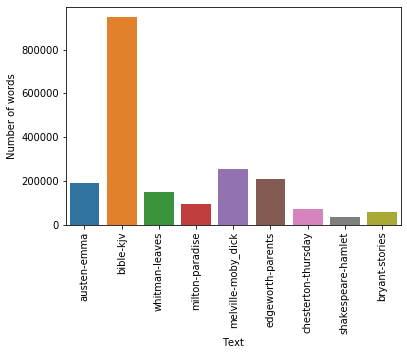

In [0]:
sns.barplot(n_o_w['Text'],n_o_w['Number of words'],label="Number of Words")
plt.xticks(rotation=90)
plt.show()

***TOKENIZING THE SELECTED TEXTS INTO SENTENCES***

In [0]:
sent1 = nltk.sent_tokenize(text1)
sent2 = nltk.sent_tokenize(text2)
sent3 = nltk.sent_tokenize(text3)
sent4 = nltk.sent_tokenize(text4)
sent5 = nltk.sent_tokenize(text5)
sent6 = nltk.sent_tokenize(text6)
sent7 = nltk.sent_tokenize(text7)

In [0]:
print(sent3)

["[Leaves of Grass by Walt Whitman 1855]\n\n\nCome, said my soul,\nSuch verses for my Body let us write, (for we are one,)\nThat should I after return,\nOr, long, long hence, in other spheres,\nThere to some group of mates the chants resuming,\n(Tallying Earth's soil, trees, winds, tumultuous waves,)\nEver with pleas'd smile I may keep on,\nEver and ever yet the verses owning--as, first, I here and now\nSigning for Soul and Body, set to them my name,\n\nWalt Whitman\n\n\n\n[BOOK I.  INSCRIPTIONS]\n\n}  One's-Self I Sing\n\nOne's-self I sing, a simple separate person,\nYet utter the word Democratic, the word En-Masse.", 'Of physiology from top to toe I sing,\nNot physiognomy alone nor brain alone is worthy for the Muse, I say\n    the Form complete is worthier far,\nThe Female equally with the Male I sing.', "Of Life immense in passion, pulse, and power,\nCheerful, for freest action form'd under the laws divine,\nThe Modern Man I sing.\n\n\n\n}", "As I Ponder'd in Silence\n\nAs I ponder

## ***PREPROCESSING OF THE DATA***

***DEFINING A FUNCTION (word_list) TO REMOVE STOPWORDS, NUMBERS, PUNCTUATIONS AS WELL AS LEMMATIZE***

In [0]:
wordlemmatize = WordNetLemmatizer()

def word_list(sent):
    sentn = ''
    sentn = sentn.join(sent)
    sentn=sentn.replace('.',' ').replace(',',' ').replace('!',' ').replace('?',' ').replace('--',' ').replace('-',' ').replace(';',' ').replace("'",' ').replace('"',' ').replace("_",' ').replace(':',' ').replace('(',' ').replace(')',' ').replace('0',' ').replace('1',' ').replace('2',' ').replace('3',' ').replace('4',' ').replace('5',' ').replace('6',' ').replace('7',' ').replace('8',' ').replace('9',' ')#REPLACING OF UNWANTED CHARACTERS
    words = nltk.word_tokenize(sentn) #TOKENIZING THE SENTENCES INTO WORDS
    stop_words = set(stopwords.words('english'))

    wordlen = []
    words = [w.lower() for w in words if not w in stop_words] #REMOVAL OF STOPWORDS FROM THE TEXT 
    for word in words:
      wordsv = wordlemmatize.lemmatize(word, pos='v') #LEMMATIZING OF THE TEXT BASED ON VERBS
      wordsa = wordlemmatize.lemmatize(wordsv, pos='a') #LEMMATIZING OF THE TEXT BASED ON ADJECTIVES
      words = wordlemmatize.lemmatize(wordsa, pos='n') #LEMMATIZING OF THE TEXT BASED ON NOUNS
      wordlen.append(words) #APPENDING THE WORDS AFTER THE REMOVAL OF STOPWORDS, UNWANTED PUNTUATIONS, SYMBOLS, NUMBERS AND LEMMANTIZING 
    return wordlen


***APPLYING THE FUNCTION (word_list) TO THE TOKENIZED SENTENCES***


In [0]:
words1 = word_list(sent1)
words2 = word_list(sent2)
words3 = word_list(sent3)
words4 = word_list(sent4)
words5 = word_list(sent5)
words6 = word_list(sent6)
words7 = word_list(sent7)


***CHECKING FOR THE LENGHT OF THE TEXTS AFTER THE FIRST FUNTION WAS APPLIED***

In [0]:
number_words_texts=[(len(words1),'austen-emma'),(len(words2),'bible-kjv'),(len(words3),'whitman-leaves'), (len(words4), 'milton-paradise'),
                    (len(words5),'melville-moby_dick'), (len(words6), 'edgeworth-parents'), (len(words7),'chesterton-thursday'),
                    (len(words8),'shakespeare-hamlet'),(len(words9),'bryant-stories')]
n_o_w = pd.DataFrame(number_words_texts)
n_o_w = n_o_w.rename(columns={0: "Number of words", 1: "Text"})
print(n_o_w)

   Number of words                 Text
0            81493          austen-emma
1           413693            bible-kjv
2            75686       whitman-leaves
3            52974      milton-paradise
4           118804   melville-moby_dick
5            87234    edgeworth-parents
6            31614  chesterton-thursday
7            18793   shakespeare-hamlet
8            24538       bryant-stories


***VISUALIZATION OF THE LENGHT OF THE TEXTS***

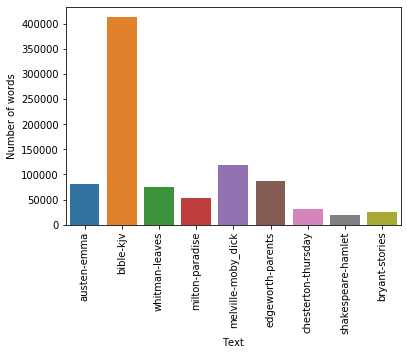

In [0]:
sns.barplot(n_o_w['Text'],n_o_w['Number of words'],label="Number of Words")
plt.xticks(rotation=90)
plt.show()

***DEFINING ANOTHER FUNTION (random_sample) TO ASSIGN 100 WORDS TO A DOCUMENT AND PICK 150 RANDOM DOCUMENTS FROM EACH TEXT***

In [0]:
def random_sample(list_words):
  count = 0
  str = ''
  for word in list_words:
    if count<150:
      str = str + word
      str = str+' '
      count = count + 1
    else:
      str = str+'###'
      count = 0
  strr = str.split('###')
  return random.sample(strr,200)
  

***APPLYING OF THE SECOND FUNCTION (random_sample) TO THE PROCESSED TEXTS***

In [0]:
r_str1 = random_sample(words1)
r_str2 = random_sample(words2)
r_str3 = random_sample(words3)
r_str4 = random_sample(words4)
r_str5 = random_sample(words5)
r_str6 = random_sample(words6)
r_str7 = random_sample(words7)


In [0]:
print(r_str1[4])

scholar parlour boarder this generally know history she visible friend acquire highbury return long visit country young lady school she pretty girl beauty happen sort emma particularly admire she short plump fair fine bloom blue eye light hair regular feature look great sweetness end even emma much please manner person quite determine continue acquaintance she strike thing remarkably clever miss smith conversation find altogether engage inconveniently shy unwilling talk yet far push shew proper become deference seem pleasantly grateful admit hartfield artlessly impress appearance every thing superior style use must good sense deserve encouragement encouragement give those soft blue eye 


***ASSIGNING THE NAME OF THE AUTHOR OF EACH DOCUMENT TO THE RESPECTIVE DOCUMENT***

In [0]:
labeled_names = ([(sent, 'austen') for sent in r_str1] + [(sent, 'austen') for sent in r_str2]+[(sent, 'mellville') for sent in r_str3]+
                 [(sent, 'edgeworth') for sent in r_str4]+[(sent, 'Bible') for sent in r_str5]+[(sent, 'chesterton') for sent in r_str6]+
								         [(sent, 'chesterton') for sent in r_str7])
pd.DataFrame(labeled_names)

,0,1
0,carriage return somebody talk rain i see umbre...,austen
1,thankfully pas six week six month ago emma cou...,austen
2,attach person speak might natural woman feel c...,austen
3,knightley hear name i sorry find love father t...,austen
4,cole call ten minute good sit hour take piece ...,austen
...,...,...
1395,pilot deliver oracle both eye bright right one...,chesterton
1396,cry ring violence there one thing i know matte...,chesterton
1397,well together third man old gentleman tight pa...,chesterton
1398,fanshaw reinforce gipsy rush mysterious man ho...,chesterton


***SHUFFLING THE LABELED NAMES AND VIEWING THEM IN A DATAFRAME USING PANDAS***

In [0]:
random.shuffle(labeled_names)
labeled = pd.DataFrame(labeled_names)

***LABELING OF THE COLUMNS OF THE DATAFRAME***

In [0]:
labeled = labeled.rename(columns={0: "Text", 1: "Author"})
labeled.head()

,Text,Author
0,i dream dream lo cake barley bread tumble host...,Bible
1,marianne margaret one memorable morning direct...,austen
2,earnest mental problem english paper innocent ...,chesterton
3,smith rather uneasy he stop emma dare attempt ...,austen
4,but in house fit discovery whale ship go taste...,mellville


***SPLITTING OF THE DATASET***

In [0]:
X = labeled['Text'].values
y = labeled['Author'].values

In [0]:
pd.DataFrame(X).head()

,0
0,i dream dream lo cake barley bread tumble host...
1,marianne margaret one memorable morning direct...
2,earnest mental problem english paper innocent ...
3,smith rather uneasy he stop emma dare attempt ...
4,but in house fit discovery whale ship go taste...


## **FEATURE ENGINEERING**
***TRANSFORMATION OF THE TEXT USING BAG OF WORDS***

In [0]:
count = CountVectorizer(min_df=3, analyzer='word', ngram_range=(1,2))#, max_features=5000) #CONSIDERING BOTH BIGRAMS AND UNIGRAMS, IGNORING WORDS THAT HAVE A DOCUMENT FREQUENCY OF LESS THAN 3 AND CONSIDERING THE TOP 5000 FEATURES BASED ON FREQUENCY ACROSS THE CORPUS.
bow = count.fit_transform(X)
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
Bow_feature_names = count.get_feature_names()

In [0]:
X_Bow = pd.DataFrame(bow.toarray(), columns=Bow_feature_names) #VIEWING IN FORM OF A DATAFRAME

In [0]:
X_Bow

,aaron,aaron son,abandon,abbey,abbey mill,abhor,abiathar,abiathar priest,abide,ability,able,able get,able give,able go,able say,able speak,able stand,able walk,abner,aboard,abominable,abomination,abomination heathen,abomination unto,abound,about,above,abraham,abraham isaac,abroad,abrupt,abruptly,abruptness,absence,absence mr,absent,absolute,absolutely,absorb,abstract,...,you seem,you shall,you speak,you talk,you tell,you think,you understand,you use,you want,you would,young,young companion,young daughter,young friend,young gentleman,young girl,young lady,young man,young men,young people,young person,young sweepstakes,young woman,your,your sister,yours,yours nutt,youth,youthful,zadok,zadok son,zeal,zebulun,zechariah,zedekiah,zedekiah king,zeruiah,zion,zodiac,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1397,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***TRANSFORMATION OF THE TEXT USING TF-IDF***

In [0]:
tf = TfidfVectorizer(analyzer='word',min_df= 3, ngram_range=(1, 2))#, max_features=5000)
Tfid = tf.fit_transform(X)
Tfid.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12593979, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
tfid_feature_names = tf.get_feature_names()
X_Tfid = pd.DataFrame(Tfid.toarray(), columns=tfid_feature_names)
X_Tfid

,aaron,aaron son,abandon,abbey,abbey mill,abhor,abiathar,abiathar priest,abide,ability,able,able get,able give,able go,able say,able speak,able stand,able walk,abner,aboard,abominable,abomination,abomination heathen,abomination unto,abound,about,above,abraham,abraham isaac,abroad,abrupt,abruptly,abruptness,absence,absence mr,absent,absolute,absolutely,absorb,abstract,...,you seem,you shall,you speak,you talk,you tell,you think,you understand,you use,you want,you would,young,young companion,young daughter,young friend,young gentleman,young girl,young lady,young man,young men,young people,young person,young sweepstakes,young woman,your,your sister,yours,yours nutt,youth,youthful,zadok,zadok son,zeal,zebulun,zechariah,zedekiah,zedekiah king,zeruiah,zion,zodiac,zone
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.12594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041859,0.0,0.0,0.075464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075464,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.00000,0.0,0

In [0]:
lda = LDA(n_components=5, n_jobs=-1)
X_lda = lda.fit_transform(X_Bow)

X_Tlda = pd.DataFrame(X_lda)
X_Tlda

,0,1,2,3,4
0,0.805859,0.190558,0.001198,0.001188,0.001196
1,0.001277,0.280433,0.143821,0.541842,0.032627
2,0.001392,0.898792,0.001408,0.096997,0.001411
3,0.001172,0.001190,0.001175,0.995274,0.001189
4,0.001433,0.001428,0.994279,0.001430,0.001430
...,...,...,...,...,...
1395,0.001295,0.033385,0.213731,0.649650,0.101939
1396,0.001284,0.760137,0.097874,0.001297,0.139408
1397,0.994784,0.001303,0.001306,0.001305,0.001302
1398,0.010820,0.001101,0.001090,0.291631,0.695358


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_lda,y, test_size=0.20, random_state=5)

In [0]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_train)

In [0]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y_test, kmeans.predict(X_test))

0.8970679346250833

In [0]:
from sklearn.metrics import silhouette_score
silhouette_score(X_test, labels=kmeans.predict(X_test))

0.6957108516262156

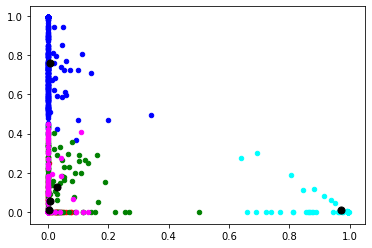

In [0]:
plt.scatter(X_train[pred_y == 0, 0], X_train[pred_y == 0, 1], s = 20, c = 'red')
plt.scatter(X_train[pred_y == 1, 0], X_train[pred_y == 1, 1], s = 20, c = 'blue')
plt.scatter(X_train[pred_y == 2, 0], X_train[pred_y == 2, 1], s = 20, c = 'green')
plt.scatter(X_train[pred_y == 3, 0], X_train[pred_y == 3, 1], s = 20, c = 'cyan')
plt.scatter(X_train[pred_y == 4, 0], X_train[pred_y == 4, 1], s = 20, c = 'magenta')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')

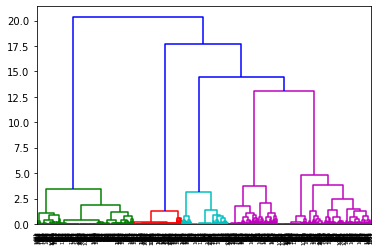

In [0]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X_train)

## ***MODELLING***

In [0]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
rf_reg = RandomForestClassifier()

scores = []
for i in range(10):
    result = next(kf.split(X_Bow), None)
    X_train = X_Bow.iloc[result[0]]
    X_test = X_Bow.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = rf_reg.fit(X_train,y_train)
    predictions = rf_reg.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
RandomForest_Bow = np.mean(scores)
print('Average K-Fold(Random Forest- BOW) Score :' , RandomForest_Bow)

Scores from each Iteration:  [0.9333333333333333, 0.9259259259259259, 0.9185185185185185, 0.9111111111111111, 0.9259259259259259, 0.9481481481481482, 0.9259259259259259, 0.9185185185185185, 0.9259259259259259, 0.9407407407407408]
Average K-Fold(Random Forest- BOW) Score : 0.9274074074074076


In [0]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
rf_reg = RandomForestClassifier()

scores = []
for i in range(10):
    result = next(kf.split(X_Tfid), None)
    X_train = X_Tfid.iloc[result[0]]
    X_test = X_Tfid.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = rf_reg.fit(X_train,y_train)
    predictions = rf_reg.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
RandomForest_Tfid = np.mean(scores)
print('Average K-Fold Score(Random Forest- TFid) :' , RandomForest_Tfid)

Scores from each Iteration:  [0.9259259259259259, 0.9333333333333333, 0.9703703703703703, 0.9407407407407408, 0.9407407407407408, 0.9259259259259259, 0.8888888888888888, 0.9333333333333333, 0.9333333333333333, 0.9407407407407408]
Average K-Fold Score(Random Forest- TFid) : 0.9333333333333333


In [0]:

f = KFold(n_splits = 10, shuffle = False, random_state=None)
clf = SVC()

scores = []
for i in range(10):
    result = next(kf.split(X_Bow), None)
    X_train = X_Bow.iloc[result[0]]
    X_test = X_Bow.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
SVM_Bow = np.mean(scores)
print('Average K-Fold Score(SVM- BOW) :' , SVM_Bow)


Scores from each Iteration:  [0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]
Average K-Fold Score(SVM- BOW) : 0.9555555555555555


In [0]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
clf = SVC()

scores = []
for i in range(10):
    result = next(kf.split(X_Tfid), None)
    X_train = X_Tfid.iloc[result[0]]
    X_test = X_Tfid.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
SVM_Tfid = np.mean(scores)
print('Average K-Fold Score(SVM- TFid) :' , SVM_Tfid)


Scores from each Iteration:  [0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]
Average K-Fold Score(SVM- TFid) : 0.9777777777777776


In [0]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
dtc = DecisionTreeClassifier()

scores = []
for i in range(10):
    result = next(kf.split(X_Bow), None)
    X_train = X_Bow.iloc[result[0]]
    X_test = X_Bow.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = dtc.fit(X_train,y_train)
    predictions = dtc.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
DecisionTree_Bow = np.mean(scores)
print('Average K-Fold Score(Decision Tree- BOW) :' , DecisionTree_Bow)


Scores from each Iteration:  [0.8148148148148148, 0.8, 0.8148148148148148, 0.7851851851851852, 0.8074074074074075, 0.7851851851851852, 0.7777777777777778, 0.8074074074074075, 0.7777777777777778, 0.7925925925925926]
Average K-Fold Score(Decision Tree- BOW) : 0.7962962962962963


In [0]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
dtc = DecisionTreeClassifier()

scores = []
for i in range(10):
    result = next(kf.split(X_Tfid), None)
    X_train = X_Tfid.iloc[result[0]]
    X_test = X_Tfid.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = dtc.fit(X_train,y_train)
    predictions = dtc.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
DecisionTree_Tfid = np.mean(scores)
print('Average K-Fold Score(Decision Tree- TFid) :' , DecisionTree_Tfid)

Scores from each Iteration:  [0.8, 0.8296296296296296, 0.8148148148148148, 0.8074074074074075, 0.8074074074074075, 0.8148148148148148, 0.8074074074074075, 0.8074074074074075, 0.8222222222222222, 0.8148148148148148]
Average K-Fold Score(Decision Tree- TFid) : 0.8125925925925925


In [0]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
neigh = KNeighborsClassifier(n_neighbors=3)

scores = []
for i in range(10):
    result = next(kf.split(X_Bow), None)
    X_train = X_Bow.iloc[result[0]]
    X_test = X_Bow.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = neigh.fit(X_train,y_train)
    predictions = neigh.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
KNN_Bow = np.mean(scores)
print('Average K-Fold Score(KNN- BOW) :' , KNN_Bow)

Scores from each Iteration:  [0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889, 0.4888888888888889]
Average K-Fold Score(KNN- BOW) : 0.4888888888888888


In [0]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
neigh = KNeighborsClassifier(n_neighbors=3)

scores = []
for i in range(10):
    result = next(kf.split(X_Tfid), None)
    X_train = X_Tfid.iloc[result[0]]
    X_test = X_Tfid.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = neigh.fit(X_train,y_train)
    predictions = neigh.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
KNN_Tfid = np.mean(scores)
print('Average K-Fold Score(KNN- TFid) :' , KNN_Tfid)

Scores from each Iteration:  [0.9407407407407408, 0.9407407407407408, 0.9407407407407408, 0.9407407407407408, 0.9407407407407408, 0.9407407407407408, 0.9407407407407408, 0.9407407407407408, 0.9407407407407408, 0.9407407407407408]
Average K-Fold Score(KNN- TFid) : 0.9407407407407409


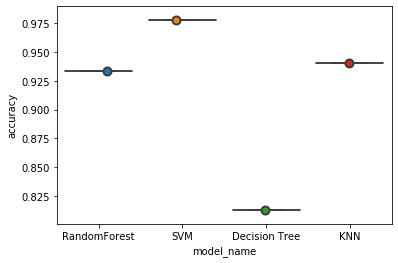

In [0]:
entries = [('RandomForest', RandomForest_Tfid),('SVM', SVM_Tfid), ('Decision Tree', DecisionTree_Tfid), ('KNN', KNN_Tfid)]
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

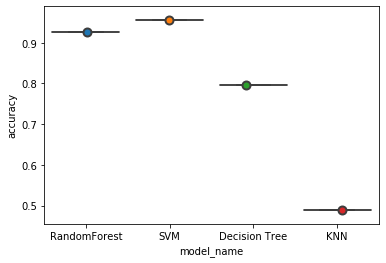

In [0]:
entries = [('RandomForest', RandomForest_Bow),('SVM', SVM_Bow), ('Decision Tree', DecisionTree_Bow), ('KNN', KNN_Bow)]
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

### ***MODEL EVALUATION***
***SVM - TF-IDF***

In [0]:
model = SVC()

X_train,X_test,y_train,y_test,indices_train, indices_test = train_test_split(X_Tfid,y,labeled.index, test_size=0.30, random_state=5)

In [0]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      0.95      0.96        39
           2       0.98      0.89      0.93        46
           3       1.00      0.96      0.98        47
           4       0.92      1.00      0.96        49
           5       0.98      0.94      0.96        49
           6       0.95      1.00      0.97        37
           7       1.00      1.00      1.00        44
           8       0.88      0.98      0.93        46

    accuracy                           0.96       405
   macro avg       0.96      0.96      0.96       405
weighted avg       0.97      0.96      0.96       405



In [0]:
print(confusion_matrix(y_test, y_pred))

[[46  0  0  0  1  1  0  0  0]
 [ 0 37  1  0  0  0  0  0  1]
 [ 0  1 41  0  2  0  1  0  1]
 [ 0  0  0 45  0  0  0  0  2]
 [ 0  0  0  0 49  0  0  0  0]
 [ 0  0  0  0  1 46  0  0  2]
 [ 0  0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  1  0 45]]


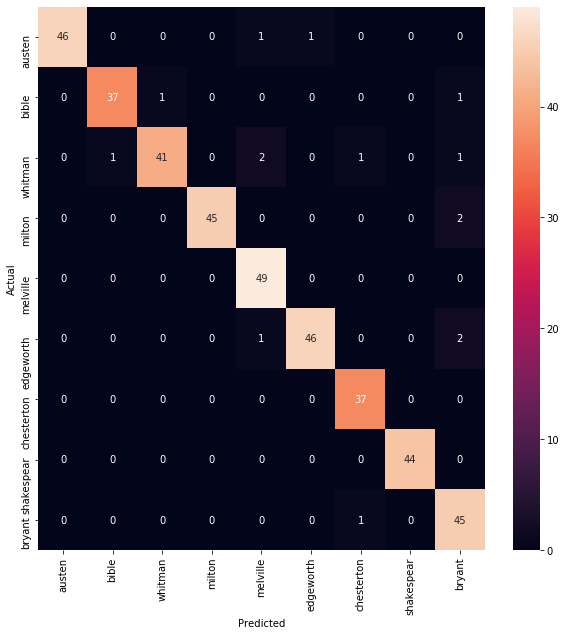

In [0]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=auth.Author.values, yticklabels=auth.Author.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

***ERROR ANALYSIS***

In [0]:
encoding = [(0,'austen'),(1,'bible'),(2,'whitman'),(3,'milton'),(4,'melville'),(5, 'edgeworth'),(6,'chesterton'),(7,'shakespear'),(8,'bryant')]
auth = pd.DataFrame(encoding)
auth = auth.rename(columns={0: "Label", 1: "Author"})
print(auth)

   Label      Author
0      0      austen
1      1       bible
2      2     whitman
3      3      milton
4      4    melville
5      5   edgeworth
6      6  chesterton
7      7  shakespear
8      8      bryant


In [0]:
for predicted in auth.Label:
  for actual in auth.Label:
    if predicted != actual and conf_mat[actual, predicted] >= 1:
      print("'{}' predicted as '{}' : {} examples.".format(y_test[actual],y_pred[predicted], conf_mat[actual, predicted]))
      display(labeled.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Author', 'Text']])
      #print(y_test.tolist().index(actual))
      print('')

'5' predicted as '1' : 1 examples.


,Author,Text
825,bryant,little lamb it beautiful song i wish know musi...



'1' predicted as '5' : 1 examples.


,Author,Text
864,bible,hear anoint david king israel philistine come ...



'7' predicted as '8' : 1 examples.


,Author,Text
843,austen,pride early i could anticipate wholly reconcil...



'5' predicted as '8' : 2 examples.


,Author,Text
753,bryant,wait neighbour must ask relative help u and ca...
95,bryant,spell word word letter address christ child yo...



'2' predicted as '8' : 1 examples.


,Author,Text
1247,melville,bottomless dey get em full dey wont hear den d...



'7' predicted as '2' : 1 examples.


,Author,Text
1095,austen,suppose place unhealthy i sure may depend thor...



'5' predicted as '6' : 1 examples.


,Author,Text
254,bryant,we daren go hunt for fear little men wee folk ...



'7' predicted as '6' : 1 examples.


,Author,Text
343,whitman,serve parturition transition and people sight ...



'1' predicted as '7' : 1 examples.


,Author,Text
1287,bible,silence counsel after word spake speech drop u...



'5' predicted as '7' : 1 examples.


,Author,Text
681,bryant,afterward maybe would like hear poem write fou...



'8' predicted as '7' : 2 examples.


,Author,Text
689,chesterton,honour elect thursday central european council...
999,chesterton,girl



'2' predicted as '7' : 2 examples.


,Author,Text
1011,melville,i instinct follow street take waterward doubtl...
1036,melville,indian tradition white steed prairie magnifice...


In [0]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']